The project is about recommending developers to solve a bug based on their source code. I used a supervised dataset [any commit which are related to a bug has an asigned author (developers)]. I used LDA method to find the domians (topics) of each developer, then I asign them to a bug based on their domain. Also, I used a classification method (KNN) as a baseline to compare the result of LDA with the baseline.
For dataset I used two method that I called them "NLP" and "AST". For NLP dataset, I used language processing tokenizer to extract the tokens within a source code. For "AST" dataset, I used Abstract Syntax Tree and considered each node of tree as a token.
"Pydriller" that I import below is a libriary to drill (scrape) the github repository. I extracted one year data (commit) for 15 developers from "Panda" Repository.
The structure of report is as below:
1. extracting data of github for NLP study
2. LDA method on NLP data
3. KNN method on NLP data
4. extracting data for AST study
5. a step by step explanation of how AST function works and find the tokens
6. Run the AST function on whole dataset to extract tokens
7. KNN method on AST data
8. LDA method on AST data
9. Conclusion

In [1]:
import pydriller as pyd
import pandas as pd
from datetime import datetime

In [2]:
#this is a path of panda repository
path = "https://github.com/pandas-dev/pandas.git"

In [3]:
#here I defined the one year duration to extract the data
dt1 = datetime(2018, 10, 1)
dt2 = datetime(2019, 10, 31)

1. extracting data of github for NLP stud
  * df_source is stored those commits which are related to developement, test, optimization, etc.
  * df_bug is stored those commits which are related to bugs
  * good point about panda repository is that those commits which are related to bugs, starts with "BUG:" in title
  * This is a dataset for "NLP" part. Here, I extract 'diff' file. 'diff' is one of the objects of commit in git repository. It shows the difference between two files after submmiting a commit. 'diff' file contains all lines that developer add/remove within a file.

In [503]:
#a dataframe to store commits related to developement
df_source = pd.DataFrame(columns=['commit_ID', 'Author', 'Date', 'file_name', 'msg', 'diff'])
# a dataframe of those commits which are related to bugs
df_bug = pd.DataFrame(columns=['commit_ID', 'Author', 'file_name', 'msg', 'diff'])
#a list of 15 authors
Authors = ['Jeff Reback','jbrockmendel','Joris Van den Bossche','Tom Augspurger','gfyoung','Matthew Roeschke',
           'Terji Petersen','William Ayd','Simon Hawkins','Jeremy Schendel','Marc Garcia',
           'Pietro Battiston','h-vetinari','Christopher Whelan','alimcmaster1']

Here, in a loop, I extract all commits for list of "Authors" and between "dt1" and "dt2". Also, I seperated bug commits in 'df_bug' dataframe.
- **please be noted that below for loop takes time around 30 minutes to be run completely. Becuase it is extracting one year commits of 15 developers which is a big data

In [5]:
for commit in pyd.RepositoryMining(path_to_repo=path, since=dt1, to=dt2, only_authors=Authors).traverse_commits():
    for modified_file in commit.modifications:
        if modified_file.filename.endswith(".py"):
            if commit.msg.startswith("BUG"):
                df_bug = df_bug.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                        'Date': commit.author_date,'msg': commit.msg,
                                        'file_name': modified_file.filename,
                                        'diff': modified_file.diff}, ignore_index=True)
                #print("BUG", commit.hash, commit.author.name, commit.author_date,commit.msg,
                                           #modified_file.filename, flush=True)
            else:
                df_source = df_source.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                                 'Date': commit.author_date,'msg': commit.msg,
                                                 'file_name': modified_file.filename,
                                                 'diff': modified_file.diff}, ignore_index=True)
                #print("Code", commit.hash, commit.author.name, commit.msg,commit.author_date,
                        # modified_file.filename, flush=True)

Exception ignored in: <finalize object at 0x1adfa503820; dead>
Traceback (most recent call last):
  File "c:\users\morad\anaconda3\lib\weakref.py", line 552, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "c:\users\morad\anaconda3\lib\tempfile.py", line 795, in _cleanup
    _shutil.rmtree(name)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 513, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  [Previous line repeated 1 more time]
  File "c:\users\morad\anaconda3\lib\shutil.py", line 397, in _rmtree_unsafe
    onerror(os.unlink, fullname, sys.exc_info())
  File "c:\users\morad\anaconda3\lib\shutil.py", line 39

Here, I save both dataset into a csv file

In [6]:
df_source.to_csv(r'C:\GH-Dataset\source_Data.csv', index=None, header=True)
df_bug.to_csv(r'C:\GH-Dataset\bug_Data.csv', index=None, header=True)

In [7]:
#this is a head of df_source dataset
df_source.head()

,commit_ID,Author,Date,file_name,msg,diff
0,6247da0db4835ff723126640145b4fad3ce17343,Tom Augspurger,2018-10-02 08:50:41-05:00,conftest.py,Provide default implementation for `data_repat...,"@@ -31,12 +31,24 @@ def all_data(request, data..."
1,6247da0db4835ff723126640145b4fad3ce17343,Tom Augspurger,2018-10-02 08:50:41-05:00,test_decimal.py,Provide default implementation for `data_repat...,"@@ -30,14 +30,6 @@ def data_missing():\n r..."
2,6247da0db4835ff723126640145b4fad3ce17343,Tom Augspurger,2018-10-02 08:50:41-05:00,test_categorical.py,Provide default implementation for `data_repat...,"@@ -45,15 +45,6 @@ def data_missing():\n r..."
3,6247da0db4835ff723126640145b4fad3ce17343,Tom Augspurger,2018-10-02 08:50:41-05:00,test_integer.py,Provide default implementation for `data_repat...,"@@ -47,14 +47,6 @@ def data_missing(dtype):\n ..."
4,6247da0db4835ff723126640145b4fad3ce17343,Tom Augspurger,2018-10-02 08:50:41-05:00,test_interval.py,Provide default implementation for `data_repat...,"@@ -47,15 +47,6 @@ def data_missing():\n r..."


In [8]:
#this is the size of df_source
df_source.shape

(9286, 6)

In [9]:
#this is a head of df_bug dataset
df_bug.head()

,commit_ID,Author,file_name,msg,diff,Date
0,a277e4aec312abe78689ce361025cd60b25cf0c0,Matthew Roeschke,v0.24.0.txt,BUG: Merge timezone aware data with DST (#22825),"@@ -815,6 +815,7 @@ Reshaping\n - Bug in :meth...",2018-10-01 05:12:35-07:00
1,a277e4aec312abe78689ce361025cd60b25cf0c0,Matthew Roeschke,datetimelike.py,BUG: Merge timezone aware data with DST (#22825),"@@ -277,7 +277,7 @@ class DatetimeIndexOpsMixi...",2018-10-01 05:12:35-07:00
2,a277e4aec312abe78689ce361025cd60b25cf0c0,Matthew Roeschke,test_coercion.py,BUG: Merge timezone aware data with DST (#22825),"@@ -590,11 +590,9 @@ class TestWhereCoercion(C...",2018-10-01 05:12:35-07:00
3,a277e4aec312abe78689ce361025cd60b25cf0c0,Matthew Roeschke,test_merge.py,BUG: Merge timezone aware data with DST (#22825),"@@ -601,6 +601,30 @@ class TestMerge(object):\...",2018-10-01 05:12:35-07:00
4,5ce06b5bdb8c44043c6463bf8ce3da758800a189,Matthew Roeschke,v0.24.0.txt,BUG: to_datetime preserves name of Index argum...,"@@ -655,6 +655,7 @@ Datetimelike\n - Bug in :c...",2018-10-01 14:22:20-07:00


In [16]:
#this is the shape of df_bug
df_bug.shape

(843, 6)

Here, I check if an author has less than one commit then remove it.

In [10]:
#count number of author in both dataset
LDA_code = df_source.groupby(['Author']).size().reset_index(name='count')
LDA_bug = df_bug.groupby(['Author']).size().reset_index(name='count')

In [11]:
#Count the number of commits per author
LDA_Author = LDA_code[LDA_code['count']>1]['Author']
Final_source = df_source[df_source['Author'].isin(LDA_Author)]
Final_source= Final_source[['Author','diff','msg']]

In [12]:
#Count the number of commits per author
bug_Author = LDA_bug[LDA_bug['count']>1]['Author']
Final_bug = df_bug[df_bug['Author'].isin(bug_Author)]
Final_bug= Final_bug[['Author','diff','msg']]

There is no author who has less than 2 codes or resolved less than one bug. as you can see the size of data doesnot change.

In [623]:
Final_source.shape

(9286, 3)

In [622]:
Final_bug.shape

(843, 3)

In [14]:
#preparing dataset for LDA model[removeing extra columns]
frames = [Final_source,Final_bug]
LDA_result = pd.concat(frames, sort=True)

In [15]:
LDA_result

,Author,diff,msg
0,Tom Augspurger,"@@ -31,12 +31,24 @@ def all_data(request, data...",Provide default implementation for `data_repat...
1,Tom Augspurger,"@@ -30,14 +30,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...
2,Tom Augspurger,"@@ -45,15 +45,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...
3,Tom Augspurger,"@@ -47,14 +47,6 @@ def data_missing(dtype):\n ...",Provide default implementation for `data_repat...
4,Tom Augspurger,"@@ -47,15 +47,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...
...,...,...,...
838,jbrockmendel,"@@ -202,7 +202,7 @@ def maybe_downcast_numeric...",BUG: fix TypeError raised in maybe_downcast_nu...
839,jbrockmendel,"@@ -262,7 +262,7 @@ class SeriesGroupBy(GroupB...",BUG: fix TypeError raised in maybe_downcast_nu...
840,jbrockmendel,"@@ -1,3 +1,5 @@\n+import decimal\n+\n import n...",BUG: fix TypeError raised in maybe_downcast_nu...
841,Joris Van den Bossche,"@@ -672,7 +672,13 @@ class BaseGrouper:\n ...",BUG/TST: ensure groupby.agg preserves extensio...


2. LDA method on NLP data
   * I extract token and calculate the tf-idf of each token with "TfidfVectorizer()" which extract tokens within a data and claculate the tf-idf per each token at the same time

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#creating an object of tfidfvectorizer with max_dif= 0.95 and min_df =2 
#which means those words appear in maximum 95% of data and minimum 2 of data
#I consider the source code as an english text file
cv_code =  TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [18]:
#we only need the 'diff' column. 'diff' columns contains the content of codes that developer add/remove from main file.
LDA_dtm = cv_code.fit_transform(LDA_result['diff'])

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
#create our LDA model with 10 components (10 topic) and also random seed 42 to keep the result same after rerunning
LDA_model = LatentDirichletAllocation(n_components=10,random_state=42)

In [21]:
#fitting the model with LDA_dtm which contains the tf-idf of each token
LDA_model.fit(LDA_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [596]:
#here is the number of features (tokens)
len(cv_code.get_feature_names())

34457

In [22]:
#Here I preint 25 top words of each topic to show how the LDA model assign the different topic to a group of words. 
#I consider each topic as a domain in code
for index,domain in enumerate(LDA_model.components_):
    print(f'THE TOP 20 WORDS FOR domain #{index}')
    print([cv_code.get_feature_names()[i] for i in domain.argsort()[-25:]])
    print('\n')

THE TOP 20 WORDS FOR domain #0
['copy', 'value', 'str', 'multiindex', 'func', 'false', 'bug', 'method', 'columns', 'dtype', 'def', 'meth', 'data', 'pandas', 'level', 'values', 'raise', 'key', 'dataframe', 'return', 'class', 'series', 'issue', 'index', 'self']


THE TOP 20 WORDS FOR domain #1
['categorical', 'right', 'parametrize', 'categories', 'object', 'idx', 'false', 'class', 'mark', 'result', 'match', 'true', 'expected', 'tm', 'raises', 'pd', 'msg', 'self', 'assert', 'array', 'index', 'def', 'pytest', 'dtype', 'np']


THE TOP 20 WORDS FOR domain #2
['axis', 'class', '10', 'pd', 'frame', 'foo', 'false', 'series', 'pytest', 'true', 'loc', 'assert_frame_equal', 'assert', 'datetime', 'def', 'tm', 'nan', 'self', 'columns', 'np', 'result', 'dataframe', 'expected', 'index', 'df']


THE TOP 20 WORDS FOR domain #3
['2000', 'dtype', 'nan', 'date_range', 'self', 'idx', 'periods', 'exp', '10', 'index', 'def', '2011', 'pytest', 'tz', 'timestamp', 'assert', 'tm', 'np', 'series', 'freq', 'expecte

In [23]:
#Here I transform the topics to the model
code_domain_results = LDA_model.transform(LDA_dtm)

In [25]:
#Here, finally I assign a topic(domain) to each developer
LDA_result['domain'] = code_domain_results.argmax(axis=1)

In [26]:
LDA_result

,Author,diff,msg,domain
0,Tom Augspurger,"@@ -31,12 +31,24 @@ def all_data(request, data...",Provide default implementation for `data_repat...,9
1,Tom Augspurger,"@@ -30,14 +30,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...,1
2,Tom Augspurger,"@@ -45,15 +45,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...,1
3,Tom Augspurger,"@@ -47,14 +47,6 @@ def data_missing(dtype):\n ...",Provide default implementation for `data_repat...,1
4,Tom Augspurger,"@@ -47,15 +47,6 @@ def data_missing():\n r...",Provide default implementation for `data_repat...,1
...,...,...,...,...
838,jbrockmendel,"@@ -202,7 +202,7 @@ def maybe_downcast_numeric...",BUG: fix TypeError raised in maybe_downcast_nu...,8
839,jbrockmendel,"@@ -262,7 +262,7 @@ class SeriesGroupBy(GroupB...",BUG: fix TypeError raised in maybe_downcast_nu...,9
840,jbrockmendel,"@@ -1,3 +1,5 @@\n+import decimal\n+\n import n...",BUG: fix TypeError raised in maybe_downcast_nu...,1
841,Joris Van den Bossche,"@@ -672,7 +672,13 @@ class BaseGrouper:\n ...",BUG/TST: ensure groupby.agg preserves extensio...,9


In [27]:
#Here, I extract topics for bugs and source code commits
Bug_Result=LDA_result[LDA_result['msg'].str.startswith("BUG")]
Source_Result=LDA_result[-LDA_result['msg'].str.startswith("BUG")]

In [28]:
Bug_Result

,Author,diff,msg,domain
0,Matthew Roeschke,"@@ -815,6 +815,7 @@ Reshaping\n - Bug in :meth...",BUG: Merge timezone aware data with DST (#22825),0
1,Matthew Roeschke,"@@ -277,7 +277,7 @@ class DatetimeIndexOpsMixi...",BUG: Merge timezone aware data with DST (#22825),8
2,Matthew Roeschke,"@@ -590,11 +590,9 @@ class TestWhereCoercion(C...",BUG: Merge timezone aware data with DST (#22825),3
3,Matthew Roeschke,"@@ -601,6 +601,30 @@ class TestMerge(object):\...",BUG: Merge timezone aware data with DST (#22825),3
4,Matthew Roeschke,"@@ -655,6 +655,7 @@ Datetimelike\n - Bug in :c...",BUG: to_datetime preserves name of Index argum...,0
...,...,...,...,...
838,jbrockmendel,"@@ -202,7 +202,7 @@ def maybe_downcast_numeric...",BUG: fix TypeError raised in maybe_downcast_nu...,8
839,jbrockmendel,"@@ -262,7 +262,7 @@ class SeriesGroupBy(GroupB...",BUG: fix TypeError raised in maybe_downcast_nu...,9
840,jbrockmendel,"@@ -1,3 +1,5 @@\n+import decimal\n+\n import n...",BUG: fix TypeError raised in maybe_downcast_nu...,1
841,Joris Van den Bossche,"@@ -672,7 +672,13 @@ class BaseGrouper:\n ...",BUG/TST: ensure groupby.agg preserves extensio...,9


In [29]:
#Here I extract only two column of source code result which is author and domain.
#becuase after assigning a domain to each developer and also assign a domain to each bug, we don't need their code anymore(becuase we already know their domains)
Author_Domain=Source_Result[['Author','domain']]

In [30]:
Author_Domain

,Author,domain
0,Tom Augspurger,9
1,Tom Augspurger,1
2,Tom Augspurger,1
3,Tom Augspurger,1
4,Tom Augspurger,1
...,...,...
9281,William Ayd,0
9282,William Ayd,9
9283,William Ayd,2
9284,jbrockmendel,7


In [31]:
#to find the topest domain of each developer, we count the number of commits in each topic per developer
Author_groupby=Author_Domain.groupby(['Author','domain']).size().reset_index(name='count')

In [32]:
Author_groupby

,Author,domain,count
0,Christopher Whelan,0,20
1,Christopher Whelan,1,10
2,Christopher Whelan,2,1
3,Christopher Whelan,3,3
4,Christopher Whelan,4,7
...,...,...,...
138,jbrockmendel,5,46
139,jbrockmendel,6,58
140,jbrockmendel,7,41
141,jbrockmendel,8,612


In [33]:
#Here I find the top1, 3 topest and 5 topest topic per developer
Top_1_domain=Author_groupby.groupby(['Author'])['domain','count'].apply(lambda x: x.nlargest(2,columns=['count'])).reset_index()
Top_3_domain=Author_groupby.groupby(['Author'])['domain','count'].apply(lambda x: x.nlargest(3,columns=['count'])).reset_index()
Top_5_domain=Author_groupby.groupby(['Author'])['domain','count'].apply(lambda x: x.nlargest(5,columns=['count'])).reset_index()

In [34]:
top_1_Au_domain = Top_1_domain[['Author','domain']]
top_3_Au_domain = Top_3_domain[['Author','domain']]
top_5_Au_domain = Top_5_domain[['Author','domain']]

In [35]:
#Here I join the top 1, 3 topest and 5topest domains per developer with Bug_result dataset to find that 
#if the domain of bug_x is domain_A and developer who solve bug_x is dev_Y, dev_Y has domain_A as top1, 3 topest or 5topest topics or not?
Top_1_Prediction=pd.merge(Bug_Result, top_1_Au_domain, on='Author')
Top_3_Prediction=pd.merge(Bug_Result, top_3_Au_domain, on='Author')
Top_5_Prediction=pd.merge(Bug_Result, top_5_Au_domain, on='Author')

In [209]:
#Top_1_Prediction

In [36]:
#Here I calculate the accuracy which is the number of time we predict the currect developer (based on a domain) to solve a bug
Accuracy_at_top1=(len(Top_1_Prediction[(Top_1_Prediction['domain_x']==Top_1_Prediction['domain_y'])])/len(Bug_Result))*100
Accuracy_at_top3=(len(Top_3_Prediction[(Top_3_Prediction['domain_x']==Top_3_Prediction['domain_y'])])/len(Bug_Result))*100
Accuracy_at_top5=(len(Top_5_Prediction[(Top_5_Prediction['domain_x']==Top_5_Prediction['domain_y'])])/len(Bug_Result))*100

In [37]:
print("Accuracy @ Top 1 Domian:" , Accuracy_at_top1)
print("Accuracy @ Top 3 Domian:" , Accuracy_at_top3)
print("Accuracy @ Top 5 Domian:" , Accuracy_at_top5)

Accuracy @ Top 1 Domian: 31.079478054567023
Accuracy @ Top 3 Domian: 45.78884934756821
Accuracy @ Top 5 Domian: 75.68208778173191


3. KNN method on NLP data
** 
As a result of LDA in "NLP" dataset, I get the 75.68% accuracy while considering top 5 domain per each developer.
It is obvious that when we increase the number of domains the accuracy increase too. becuase the chance of finding the domain of bug in domain of developer is increased.
But in continue, I use a classification method (KNN) as a baseline to compare its result with LDA.

In [625]:
#Creating an object of tfidfvectorizer and KNN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [624]:
#dividing data into testset and trainset. but as we want to predict the developer of bugs, we already have our testset which is bug dataset
X_train = Final_source['diff']
#We consider author name as a label
Y_train = Final_source['Author']
X_test = Final_bug['diff']
Y_test = Final_bug['Author']

In [602]:
#Creating tokens and tfidf on trainset data
NLP_tfidf_transformer = TfidfVectorizer()
NLP_X_train_tfidf = NLP_tfidf_transformer.fit_transform(X_train)
NLP_X_train_tfidf.shape

(9286, 56236)

In [603]:
#create tokens and its tfidf on testset data
NLP_X_test_tfidf = NLP_tfidf_transformer.transform(X_test)
NLP_X_test_tfidf.shape

(843, 56236)

In [667]:
#creating the range of neighbors
k_range = range(1,6)
NLP_score=[]

In [668]:
#loop for different number of neighbors and calculate the accuracy of model in each number of neighbors
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(NLP_X_train_tfidf,Y_train)
    NLP_y_predict = knn.predict(NLP_X_test_tfidf)
    score= accuracy_score(Y_test, NLP_y_predict)*100
    NLP_score.append(score)
    print("The accuracy in {} neighbor is: {}".format(k, score))

The accuracy in 1 neighbor is: 44.72123368920522
The accuracy in 2 neighbor is: 29.418742586002374
The accuracy in 3 neighbor is: 31.791221826809014
The accuracy in 4 neighbor is: 22.65717674970344
The accuracy in 5 neighbor is: 21.11506524317912


It shows that LDA method on "NLP" dataset has a better accuracy than baseline model KNN. The reason is KNN is a classification model and needs more distinguished tokens (features) to be abale to classify developers correctly. 
In the other word, our main target was defining the domains of code for each developer and not classification of developers. And to define the domain based on a content topic modeling algorithms are a better choise.

4. extracting data for AST study
 * To continue the project, as I explained above, we try to extract tokens from AST (nodes of the tree) which is a better (more accurate) reflection of developers expertise.
 * To extract the tokens of each commits by AST, I extract the AST of a source code before commit and a AST of a source code after commit and then find the difference between tokens of these two files. It is a better reflection of what a developer did semantically in a code. becuase sometime a developer removes a function within a code and then paste the same function and only delete the spaces between two lines. if we check 'diff' file for this commit, it contains all removed and added lines while the developer doesn't do any real developing action.
But when we compare the AST of code before and after commit, we will find the real change and in above sample the difference of AST between two codes returns nothing (empty string)

In [2]:
import tokenize
import pydriller as cm_pyd

Here I am downloading the same dataset with the same method but this time instead of 'diff', I am downloading 'commit_before' and 'commit_after'. (for the same duration and same developer)

In [510]:
tf_dt1 = datetime(2018, 1, 1)
tf_dt2 = datetime(2019, 10, 31)
tf_source = pd.DataFrame(columns=['commit_ID', 'Author','msg', 'Commit_before', 'Commit_after'])
tf_bug = pd.DataFrame(columns=['commit_ID', 'Author','msg', 'Commit_before', 'Commit_after'])
path = "https://github.com/pandas-dev/pandas.git"
Authors = ['Jeff Reback','jbrockmendel','Joris Van den Bossche','Tom Augspurger','gfyoung','Matthew Roeschke',
           'Terji Petersen','William Ayd','Simon Hawkins','Jeremy Schendel','Marc Garcia',
           'Pietro Battiston','h-vetinari','Christopher Whelan','alimcmaster1']

- ** Please be informed that below function takes time around 45 minutes

In [511]:
for commit in cm_pyd.RepositoryMining(path_to_repo=path, since=tf_dt1, to=tf_dt2, only_authors=Authors).traverse_commits():
    for modified_file in commit.modifications:
        if modified_file.filename.endswith(".py"):
            if commit.msg.startswith("BUG"):
                tf_bug = tf_bug.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                        'msg': commit.msg,'Commit_before': modified_file.source_code_before,
                                        'Commit_after': modified_file.source_code}, ignore_index=True)
                #print("BUG", commit.hash, commit.author.name, commit.author_date,commit.msg,
                                           #modified_file.filename, flush=True)
            else:
                tf_source = tf_source.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                        'msg': commit.msg,'Commit_before': modified_file.source_code_before,
                                        'Commit_after': modified_file.source_code}, ignore_index=True)
                #print("Code", commit.hash, commit.author.name, commit.msg,commit.author_date,
                        # modified_file.filename, flush=True)

Exception ignored in: <finalize object at 0x1ad96fd04e0; dead>
Traceback (most recent call last):
  File "c:\users\morad\anaconda3\lib\weakref.py", line 552, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "c:\users\morad\anaconda3\lib\tempfile.py", line 795, in _cleanup
    _shutil.rmtree(name)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 513, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  [Previous line repeated 1 more time]
  File "c:\users\morad\anaconda3\lib\shutil.py", line 397, in _rmtree_unsafe
    onerror(os.unlink, fullname, sys.exc_info())
  File "c:\users\morad\anaconda3\lib\shutil.py", line 39

In [506]:
#importing data into csv file
tf_source.to_csv(r'C:\GH-Dataset\source_before_after.csv', index=None, header=True)
tf_bug.to_csv(r'C:\GH-Dataset\bug_before_after.csv', index=None, header=True)

Here I write a function to extract the node's name in AST by walking through the tree and visiting each node's class name

In [3]:
import ast

In [4]:
class FuncParser(ast.NodeVisitor):
    def visit_Load(self, node): pass
    def visit_Store(self, node): pass
    def visit_NameConstant(self,node):pass
    def visit_Str(self, node): 
        file_contents.append(node.__class__.__name__) 
    def visit_Num(self, node):
        file_contents.append(node.__class__.__name__)
    def visit_Module(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_keyword(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_arguments(self, node): 
        if(node.kwonlyargs == []):
                file_contents.append("arguments: Standard")
        elif (node.kw_defaults==[]):
            file_contents.append("arguments: kwonlyargs")
        else:
            file_contents.append("arguments: Arbitraryargs")
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Expr(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Assign(self, node): 
       # if(node.value != None):
            # file_contents.append(["Assign:"+node.value.__class__.__name__])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Compare(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_AugAssign(self,node):
        temp = (node.op)
        oper= "AugAssign: " + temp.__class__.__name__ +"()"
        file_contents.append(oper)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Subscript(self,node):
        index = node.slice
        if(index.__class__.__name__ == 'Index'):
            slc = index.value
            if(slc.__class__.__name__ == 'Num'):
                file_contents.append("Subscript:Index[Num]")
            elif(slc.__class__.__name__ == 'UnaryOp'):
                operand = slc.op
                file_contents.append("Subscript:Index[UnaryOp:"+operand.__class__.__name__+"]") 
            elif(slc.__class__.__name__ == 'Name'):
                file_contents.append("Subscript:Index[Var]")
        else:
            file_contents.append("Subscript:Index["+index.__class__.__name__+"]")
            
            #ast.NodeVisitor.generic_visit(self, node)
    def visit_If(self,node):
        file_contents.append(node.__class__.__name__)
        if(node.orelse == []):
            ast.NodeVisitor.generic_visit(self, node)
        else:
            file_contents.append("orelse")
            ast.NodeVisitor.generic_visit(self, node)
    def visit_FunctionDef(self,node):
        file_contents.append("FunctionDef")
        #file_contents.append([node.name])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ClassDef(self,node):
        baselist= node.bases
        if(len(baselist)==0):
            file_contents.append("ClassDef: Simple")
            ast.NodeVisitor.generic_visit(self, node)
        elif(len(baselist)==1):
            file_contents.append("ClassDef: Inherit")
            ast.NodeVisitor.generic_visit(self, node)
        elif(len(baselist)>1):
            file_contents.append("ClassDef: MultiInherit")
            ast.NodeVisitor.generic_visit(self, node)     
    def visit_Call(self, node): 
        #file_contents.append("FuncCall")
        #ast.NodeVisitor.generic_visit(self, node)
        attrib = node.func
        if(attrib.__class__.__name__ == 'Attribute'):
            file_contents.append(attrib.attr)
            ast.NodeVisitor.generic_visit(self, node)
        elif (attrib.__class__.__name__ == 'Name'):
            file_contents.append(attrib.id)
            #file_contents.append([attrib.id])
            ast.NodeVisitor.generic_visit(self, node)
    def visit_arg(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_BinOp(self,node):
        #temp = (node.op)
        #op = "BinOp: "+temp.__class__.__name__ +"()"
        #file_contents.append(op)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Import(self, node): 
        tempImpo = node.names
        if(tempImpo != None):
            listImpo = tempImpo[0]
            Impo = listImpo.name
            file_contents.append("Import")
            file_contents.append(Impo)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        module=node.module
        file_contents.append("ImportFrom")
        file_contents.append(module)
        #if(node.module != None):
           # n3= (node.module)
           # file_contents.append("ImportFrom:" + n3)
       # else:
            #file_contents.append(node.__class__.__name__)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_alias(self, node): 
        #n1 =  (node.name)
        #file_contents.append(n1)
        #if(node.asname != None):
            #n2 =  (node.asname)
            #file_contents.append([n2])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Name(self, node):
       # temp ="Name:"+node.id
        #file_contents.append([node.id])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_comprehension(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Attribute(self, node): 
        temp1 ="Name:"+node.attr
        file_contents.append(node.attr)
        ast.NodeVisitor.generic_visit(self, node)
    def generic_visit(self, node):
        file_contents.append(node.__class__.__name__)
        #for f in node._fields:
           # if(not f in stop_word):     
              #  file_contents.append([f])
        #ast.iter_fields(node)
        ast.NodeVisitor.generic_visit(self, node)

In [5]:
Final_source =  pd.read_csv('C:\GH-Dataset\GH_Data_new.csv')

In [18]:
#Final_source

In [19]:
Heap_Dev = Final_source.loc[Final_source['Author'] == 'topper-123']

In [21]:
for row in Heap_Dev.iterrows():
    print(Heap_Dev['Commit_before'][i])

NameError: name 'i' is not defined

5. a step by step explanation of how AST function works and find the tokens: in below, I show for one sample how I extract the difference token between 'before-commit' and 'after-commit'. Then I wrote a function loop which loops in all dataset to extract the difference tokens per each commit

In [7]:
#First we need to put the 'commit_before' and 'commit_after' into two different text file
#becuase AST accept a string which is a read line by line of a code file. but while we store the commit in a cell of dataframe, it is not able to be read line by line
text_before=Heap_Dev['Commit_before'][1]
text_after=Heap_Dev['Commit_after'][1]
before = open("before-commit.py", "w+")
after = open("after-commit.py", "w+")
before.write(text_before)
after.write(text_after)
#before.closed()
#after.closed()

KeyError: 1

Below, we open the 'commit-before' file read it and call "FuncParser" which is a function I wrote above to visit the nodes of AST. then I print all tokens of 'before-commit' file

In [426]:
with tokenize.open("before-commit.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_before = sf.read()

ast_before = ast.parse(source_file_before)
bf_obj = FuncParser()
bf_tree = ast.parse(ast_before)
file_contents = []
bf_obj.visit(bf_tree)

In [427]:
file_contents

[['Import:decimal'],
 ['Import:random'],
 ['Import:numpy'],
 ['ImportFrom:np'],
 ['Import:pandas'],
 ['ImportFrom:pd'],
 ['Import:pandas.util.testing'],
 ['ImportFrom:tm'],
 ['Import:pytest'],
 ['ImportFrom:pandas.tests.extension'],
 ['Import:base'],
 ['ImportFrom:array'],
 ['Import:DecimalDtype'],
 ['Import:DecimalArray'],
 ['FunctionDef'],
 ['arguments'],
 ['Return'],
 ['ListComp'],
 ['Call'],
 ['Decimal'],
 ['Name:decimal'],
 ['Call'],
 ['random'],
 ['Name:random'],
 ['comprehension'],
 ['Name:_'],
 ['Call'],
 ['Name:range'],
 ['Num'],
 ['FunctionDef'],
 ['arguments'],
 ['Return'],
 ['Call'],
 ['Name:DecimalDtype'],
 ['fixture'],
 ['Name:pytest'],
 ['FunctionDef'],
 ['arguments'],
 ['Return'],
 ['Call'],
 ['Name:DecimalArray'],
 ['Call'],
 ['Name:make_data'],
 ['fixture'],
 ['Name:pytest'],
 ['FunctionDef'],
 ['arguments'],
 ['Return'],
 ['Call'],
 ['Name:DecimalArray'],
 ['List'],
 ['Call'],
 ['Decimal'],
 ['Name:decimal'],
 ['Str'],
 ['Call'],
 ['Decimal'],
 ['Name:decimal'],
 ['N

In [428]:
#here we count the number of tokens for 'before-commit' file
dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])

tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
tokens_before

,token
Call,119
Str,45
Name:decimal,32
arguments,29
FunctionDef,28
...,...
arg:all_data,1
Name:random,1
Name:pow,1
ImportFrom:tm,1


below we are doing the same strategy but this time for 'commit-after' file

In [429]:
with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_after = sf.read()

after = ast.parse(source_file_after)
ast_after = ast.parse(source_file_after)
aft_obj = FuncParser()
aft_tree = ast.parse(ast_after)
file_contents = []
aft_obj.visit(aft_tree)

In [430]:
dtobj_after = pd.DataFrame(file_contents, columns=['token'])

tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
tokens_after

,token
Call,116
Str,45
Name:decimal,32
arguments,27
FunctionDef,26
...,...
Import:pytest,1
Name:_,1
context,1
assert_extension_array_equal,1


Then we calculate the difference of tokens into both file, before and after. those tokens which has '0' counts are new tokens wich are exist in only one of the files (before or after).

In [431]:
diff = tokens_after.subtract(tokens_before)

In [432]:
diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
diff_token=diff_token.fillna(0)
diff_token= diff_token.abs()
diff_token = diff_token.reset_index()
diff_token

,index,token
0,Call,3.0
1,For,1.0
2,FunctionDef,2.0
3,Name:DecimalArray,1.0
4,Name:_,1.0
5,Name:count,0.0
6,Name:gen,0.0
7,Name:make_data,1.0
8,Name:pytest,1.0
9,Name:range,1.0


I create a list to save the result per commit and its developer

In [434]:
df_author_token = pd.DataFrame(columns=['Author','msg', 'tokens', 'counts'])

In [435]:
df_author_token = df_author_token.append({'Author':tf_source['Author'][1],'msg':tf_source['msg'][1]
                                         ,'tokens':diff_token['index'],'counts':diff_token['token']},ignore_index=True)

In [436]:
df_author_token

,Author,msg,tokens,counts
0,Tom Augspurger,Provide default implementation for `data_repat...,0 Call 1 Fo...,0 3.0 1 1.0 2 2.0 3 1.0 4 ...


As I mentioned above, here I am showing the step by step of a function that will be apply to all dataset in continue.
below I am creating the dictiory of extracted tokens.

In [437]:
x=df_author_token['tokens'][0]
y=df_author_token['counts'][0]

In [438]:
vocab = {}
i = 1
for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'Call': 1, 'For': 2, 'FunctionDef': 3, 'Name:DecimalArray': 4, 'Name:_': 5, 'Name:count': 6, 'Name:gen': 7, 'Name:make_data': 8, 'Name:pytest': 9, 'Name:range': 10, 'Yield': 11, 'arg:count': 12, 'arguments': 13, 'fixture': 14}


In [439]:
one = [df_author_token['Author'][0]]+[0]*len(vocab)
one

['Tom Augspurger', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [440]:
# here I try to count the number of each vocab in diff_token of each commit per developer
i=0
for word in x:
    one[vocab[word]]+=y[i]
    i+=1
    
one

['Tom Augspurger',
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0]

In [516]:
#create a new list to repeat all above steps in a loop function
df_author_token = pd.DataFrame(columns=['Author','msg', 'tokens', 'counts'])

6. Run the AST function on whole dataset to extract tokens
  - ** please be inform that two code sections below loops within all code-commit and bug-commit to count the difference of tokens and it takes around 30 minutes to be run

In [517]:
i=0
error=0
vocab = {}
j = 1
for row in tf_source.iterrows():
    if tf_source['Commit_before'][i] is not None:
        text_before=tf_source['Commit_before'][i]
    if tf_source['Commit_after'][i] is not None:
        text_after=tf_source['Commit_after'][i]
    before = open("before-commit.py", "w+")
    after = open("after-commit.py", "w+")
    try:
        before.write(text_before)
    except ValueError:
        #print("Oops!  Error in writing to the before file #",i)
        error+=1
    try:
        after.write(text_after)
    except ValueError:
        #print("Oops!  Error in writing to the After file #",i)
        error+=1
    #this for commit before
    with tokenize.open("before-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_before = sf.read()
            ast_before = ast.parse(source_file_before)
        except ValueError:
            error+=1
            #print("Oops!  Error in before commit #",i)       
    bf_obj = FuncParser()
    bf_tree = ast.parse(ast_before)
    file_contents = []
    bf_obj.visit(bf_tree)
    #counting tokens in file before
    dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])
    tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
    #doing the same for file after
    with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_after = sf.read()
            ast_after = ast.parse(source_file_after)
        except ValueError:
            error+=1
            #print("Oops!  Error in after commit #",i)
    aft_obj = FuncParser()
    aft_tree = ast.parse(ast_after)
    file_contents = []
    aft_obj.visit(aft_tree)
    #counting
    dtobj_after = pd.DataFrame(file_contents, columns=['token'])
    tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
    #calculating the difference
    diff = tokens_after.subtract(tokens_before)
    diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
    diff_token=diff_token.fillna(0)
    diff_token= diff_token.abs()
    diff_token = diff_token.reset_index()
    df_author_token = df_author_token.append({'Author':tf_source['Author'][i],'msg':tf_source['msg'][i]
                                         ,'tokens':diff_token['index'],'counts':diff_token['token']},ignore_index=True)
    i+=1
    for word in diff_token['index']:
        if word in vocab:
            continue
        else:
            vocab[word]=j
            j+=1
    
    
    
    

In [518]:
i=0
bug_error=0
for row in tf_bug.iterrows():
    if tf_bug['Commit_before'][i] is not None:
        text_before=tf_bug['Commit_before'][i]
    if tf_bug['Commit_after'][i] is not None:
        text_after=tf_bug['Commit_after'][i]
    before = open("before-commit.py", "w+")
    after = open("after-commit.py", "w+")
    try:
        before.write(text_before)
    except ValueError:
        #print("Oops!  Error in writing to the before file #",i)
        bug_error+=1
    try:
        after.write(text_after)
    except ValueError:
        #print("Oops!  Error in writing to the After file #",i)
        bug_error+=1
    #this for commit before
    with tokenize.open("before-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_before = sf.read()
            ast_before = ast.parse(source_file_before)
        except ValueError:
            bug_error+=1
            #print("Oops!  Error in before commit #",i)       
    bf_obj = FuncParser()
    bf_tree = ast.parse(ast_before)
    file_contents = []
    bf_obj.visit(bf_tree)
    #counting tokens in file before
    dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])
    tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
    #doing the same for file after
    with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_after = sf.read()
            ast_after = ast.parse(source_file_after)
        except ValueError:
            bug_error+=1
            #print("Oops!  Error in after commit #",i)
    aft_obj = FuncParser()
    aft_tree = ast.parse(ast_after)
    file_contents = []
    aft_obj.visit(aft_tree)
    #counting
    dtobj_after = pd.DataFrame(file_contents, columns=['token'])
    tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
    #calculating the difference
    diff = tokens_after.subtract(tokens_before)
    diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
    diff_token=diff_token.fillna(0)
    diff_token= diff_token.abs()
    diff_token = diff_token.reset_index()
    df_author_token = df_author_token.append({'Author':tf_bug['Author'][i],'msg':tf_bug['msg'][i]
                                         ,'tokens':diff_token['index'],'counts':diff_token['token']},ignore_index=True)
    i+=1
    for word in diff_token['index']:
        if word in vocab:
            continue
        else:
            vocab[word]=j
            j+=1
    
    
    
    

In [620]:
df_author_token.shape

(9100, 4)

In [520]:
#number of vocab
j

17621

In [447]:
import numpy as np

In [448]:
vocab

{'Call': 1,
 'For': 2,
 'FunctionDef': 3,
 'Name:DecimalArray': 4,
 'Name:_': 5,
 'Name:count': 6,
 'Name:gen': 7,
 'Name:make_data': 8,
 'Name:pytest': 9,
 'Name:range': 10,
 'Yield': 11,
 'arg:count': 12,
 'arguments': 13,
 'fixture': 14,
 'Name:Categorical': 15,
 'Str': 16,
 'Name:data': 17,
 'arg:data': 18,
 'Compare': 19,
 'If': 20,
 'IsNot': 21,
 'Name:dtype': 22,
 'Name:keep_tz': 23,
 'Name:self': 24,
 'NameConstant': 25,
 'Return': 26,
 '_to_embed': 27,
 'arg:dtype': 28,
 'arg:keep_tz': 29,
 'arg:self': 30,
 'astype': 31,
 'keep_tz': 32,
 'Name:values': 33,
 'Name:object': 34,
 'values': 35,
 'BinOp: Mod()': 36,
 'Index': 37,
 'Mod': 38,
 'Name:NDFrame': 39,
 'Name:Substitution': 40,
 'Name:_shared_docs': 41,
 'Subscript': 42,
 '__doc__': 43,
 'reindex': 44,
 'sort_index': 45,
 'sort_values': 46,
 'Name:Appender': 47,
 'Name:_shared_doc_kwargs': 48,
 'Name:dict': 49,
 'Name:rename': 50,
 'axes': 51,
 'klass': 52,
 'optional_axis': 53,
 'optional_labels': 54,
 'optional_mapper':

In [521]:
#creating an empty matrix in size of all commits and number of tokens and try to import the number of each token per commit and developer into a new dataset
vocab_range = len(vocab)+1
cv_token = pd.DataFrame(0, index=np.arange(len(df_author_token)), columns=range(1,vocab_range))

adding to extra columns: commit_author to store author name and commit_msg to seperate bug commits from others

In [523]:
cv_token['commit_Author'] =0

In [524]:
cv_token['commit_msg']=0

In [525]:
#this is an empty matrix of tokens
cv_token

,1,2,3,4,5,6,7,8,9,10,...,17613,17614,17615,17616,17617,17618,17619,17620,commit_Author,commit_msg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
x= df_author_token['tokens'][0]
y= df_author_token['counts'][0]


In [415]:
vocab['Call']

1

In [295]:
i=0
for word in x:
    if y[i]==0:
        cv_token[word][0]+=1
    else:
        cv_token[word][0]+=y[i]
print(cv_token[word][0])
    #print(word)

4


Here based on the information in "df_author_token", I try to complate the "cv_token" by finding the number of that token for that specific commits and its author.

In [526]:
x=0
for row in df_author_token.iterrows():
    y=0
    temp_token = df_author_token['tokens'][x]
    temp_count = df_author_token['counts'][x]
    for word in temp_token:
        if temp_count[y] == 0:
            cv_token[vocab[word]][x]+=1
            y+=1
        else:
            cv_token[vocab[word]][x]+=temp_count[y]
            y+=1
    cv_token['commit_Author'][x]=df_author_token['Author'][x]
    cv_token['commit_msg'][x]=df_author_token['msg'][x]
    x+=1
    
    


c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\morad\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_p

In [527]:
#cv_token is a huge sparse matrix
cv_token

,1,2,3,4,5,6,7,8,9,10,...,17613,17614,17615,17616,17617,17618,17619,17620,commit_Author,commit_msg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tom Augspurger,PERF: Faster Series.__getattribute__ (#20834)
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tom Augspurger,PERF: Faster Series.__getattribute__ (#20834)
2,2,1,1,0,1,1,1,1,3,1,...,0,0,0,0,0,0,0,0,Tom Augspurger,PERF: Faster Series.__getattribute__ (#20834)
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tom Augspurger,PERF: Faster Series.__getattribute__ (#20834)
4,2,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,Tom Augspurger,PERF: Faster Series.__getattribute__ (#20834)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,jbrockmendel,BUG: fix TypeError raised in maybe_downcast_nu...
9096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,jbrockmendel,BUG: fix TypeError raised in maybe_downcast_nu...
9097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,jbrockmendel,BUG: fix TypeError raised in maybe_downcast_nu...
9098,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Joris Van den Bossche,BUG/TST: ensure groupby.agg preserves extensio...


In [528]:
#sperating bug commits and code commits
Bug_tokenizer=cv_token[cv_token['commit_msg'].str.startswith("BUG")]
Source_tokenizer=cv_token[-cv_token['commit_msg'].str.startswith("BUG")]

In [529]:
Bug_tokenizer = Bug_tokenizer.reset_index()

7. KNN method on AST data

In [530]:
#creating the train and test set based same as pervious dataset.
#the difference is here we have the vectorized matrix and we only need to calculate tf-idf of each token
X_train_tokens  = Source_tokenizer.drop(['commit_Author', 'commit_msg'], axis=1)
X_test_tokens  = Bug_tokenizer.drop(['commit_Author', 'commit_msg','index'], axis=1)
Y_train_tokens = Source_tokenizer['commit_Author']
Y_test_tokens = Bug_tokenizer['commit_Author']

In [533]:
#calculating the tf-idf matrix
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_tokens)
X_train_tfidf.shape

(8455, 17620)

In [534]:
X_train_tfidf

<8455x17620 sparse matrix of type '<class 'numpy.float64'>'
	with 222096 stored elements in Compressed Sparse Row format>

In [535]:
Source_tokenizer.shape

(8455, 17622)

In [537]:
X_test_tfidf = tfidf_transformer.transform(X_test_tokens)
X_test_tfidf

<645x17620 sparse matrix of type '<class 'numpy.float64'>'
	with 14260 stored elements in Compressed Sparse Row format>

In [499]:
from sklearn.neighbors import KNeighborsClassifier

In [670]:
k_range = range(1,6)
score={}
AST_score=[]

In [671]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf,Y_train_tokens)
    y_predict = knn.predict(X_test_tfidf)
    score= accuracy_score(Y_test_tokens, y_predict)*100
    AST_score.append(score)
    print("The accuracy in {} neighbor is: {}".format(k, score))
    #score_list.append(score[k])

The accuracy in 1 neighbor is: 33.33333333333333
The accuracy in 2 neighbor is: 27.286821705426355
The accuracy in 3 neighbor is: 27.131782945736433
The accuracy in 4 neighbor is: 26.046511627906977
The accuracy in 5 neighbor is: 26.82170542635659


8. LDA method on AST data
 * Here we are going to do the same step for LDA as pervious but this time in AST dataset

In [541]:
from sklearn.decomposition import LatentDirichletAllocation

In [542]:
LDA_model_ast = LatentDirichletAllocation(n_components=10,random_state=42)

In [543]:
All_LDA_tokens = cv_token.drop(['commit_Author', 'commit_msg'], axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_tokens)
X_train_tfidf.shape

In [545]:
All_LDA_tokens.shape

(9100, 17620)

In [546]:
LDA_model_ast.fit(All_LDA_tokens)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [567]:
list_vocab = list(vocab)
len(list_vocab)

17620

In [574]:
(LDA_model.components_)[0].argsort()[-25:]

array([12650, 33402, 25823, 20440, 15890, 15189, 11245, 20052, 12220,
       14116, 13306, 20050, 12982, 21995, 19155, 33424, 23273, 18731,
       13031, 24012, 11923, 24810, 18410, 17525, 24745], dtype=int64)

In [575]:
for index,domain in enumerate(LDA_model_ast.components_):
    print(f'THE TOP 20 WORDS FOR domain #{index}')
    print([list_vocab[i] for i in domain.argsort()[-25:]])
    print('\n')

THE TOP 20 WORDS FOR domain #0
['periods', 'parametrize', 'resample', 'Lambda', 'Dict', 'freq', 'Tuple', 'NameConstant', 'index', 'mark', 'match', 'Name:expected', 'arg:self', 'Name:msg', 'Name:pd', 'Name:result', 'Name:pytest', 'With', 'withitem', 'FunctionDef', 'Num', 'arguments', 'List', 'Call', 'Str']


THE TOP 20 WORDS FOR domain #1
['left', 'Name:cat', 'Name:closed', 'Name:period_range', 'Name:rvalues', 'Tuple', 'string_types', 'ImportFrom:pandas.compat', 'Name:target', 'Name:bool', 'NameConstant', 'Import:pandas.compat', 'ImportFrom:compat', 'Import:range', 'Name:PeriodIndex', 'Import:compat', 'ImportFrom:pandas', 'skipna', 'format', 'BinOp: Mod()', 'Mod', 'Name:compat', 'Name:left', 'Name:right', 'Name:str']


THE TOP 20 WORDS FOR domain #2
['ImportFrom:tm', 'arg:request', 'For', 'Name:arr', 'Name:request', 'dtype', 'random', 'ClassDef', 'Name:b', 'xfail', 'param', 'Name:msg', 'Name:a', 'fixture', 'parametrize', 'assert_raises_regex', 'mark', 'withitem', 'With', 'match', 'nan',

In [576]:
AST_domain_results = LDA_model_ast.transform(All_LDA_tokens)

In [580]:
cv_token['domain'] = AST_domain_results.argmax(axis=1)

In [582]:
AST_Bug_LDA=cv_token[cv_token['commit_msg'].str.startswith("BUG")]
AST_Source_LDA=cv_token[-cv_token['commit_msg'].str.startswith("BUG")]

In [583]:
AST_Author_Domain=AST_Source_LDA[['commit_Author','domain']]

In [588]:
AST_Author_groupby=AST_Author_Domain.groupby(['commit_Author','domain']).size().reset_index(name='count')

In [589]:
AST_Top_1_domain=AST_Author_groupby.groupby(['commit_Author'])['domain','count'].apply(lambda x: x.nlargest(2,columns=['count'])).reset_index()
AST_Top_3_domain=AST_Author_groupby.groupby(['commit_Author'])['domain','count'].apply(lambda x: x.nlargest(3,columns=['count'])).reset_index()
AST_Top_5_domain=AST_Author_groupby.groupby(['commit_Author'])['domain','count'].apply(lambda x: x.nlargest(5,columns=['count'])).reset_index()

In [590]:
AST_top_1_Au_domain = AST_Top_1_domain[['commit_Author','domain']]
AST_top_3_Au_domain = AST_Top_3_domain[['commit_Author','domain']]
AST_top_5_Au_domain = AST_Top_5_domain[['commit_Author','domain']]

In [591]:
AST_Top_1_Prediction=pd.merge(AST_Bug_LDA, AST_top_1_Au_domain, on='commit_Author')
AST_Top_3_Prediction=pd.merge(AST_Bug_LDA, AST_top_3_Au_domain, on='commit_Author')
AST_Top_5_Prediction=pd.merge(AST_Bug_LDA, AST_top_5_Au_domain, on='commit_Author')

In [594]:
AST_Accuracy_at_top1=(len(AST_Top_1_Prediction[(AST_Top_1_Prediction['domain_x']==AST_Top_1_Prediction['domain_y'])])/len(AST_Bug_LDA))*100
AST_Accuracy_at_top3=(len(AST_Top_3_Prediction[(AST_Top_3_Prediction['domain_x']==AST_Top_3_Prediction['domain_y'])])/len(AST_Bug_LDA))*100
AST_Accuracy_at_top5=(len(AST_Top_5_Prediction[(AST_Top_5_Prediction['domain_x']==AST_Top_5_Prediction['domain_y'])])/len(AST_Bug_LDA))*100

In [595]:
print("Accuracy @ Top 1 Domian:" , AST_Accuracy_at_top1)
print("Accuracy @ Top 3 Domian:" , AST_Accuracy_at_top3)
print("Accuracy @ Top 5 Domian:" , AST_Accuracy_at_top5)

Accuracy @ Top 1 Domian: 43.72093023255814
Accuracy @ Top 3 Domian: 55.03875968992248
Accuracy @ Top 5 Domian: 79.68992248062015


9. **Conclusion**

In [637]:
import matplotlib.pyplot as plt

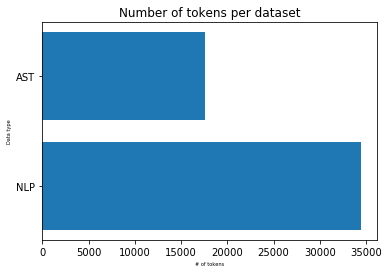

In [640]:
index = ['NLP','AST']
data = [len(cv_code.get_feature_names()),len(list_vocab)]
plt.barh(index, data)
plt.xlabel('# of tokens', fontsize=5)
plt.ylabel('Data type', fontsize=5)
plt.title('Number of tokens per dataset')
plt.show()

as we can find the number of token in AST method is less than NLP becuase AST considers more abstract tokens which are common in different python code.

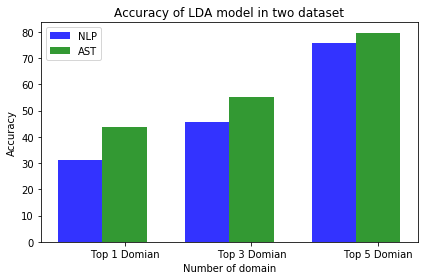

In [657]:
NLP_LDA_Accuracy= [Accuracy_at_top1,Accuracy_at_top3,Accuracy_at_top5]
AST_LDA_Accuracy = [AST_Accuracy_at_top1,AST_Accuracy_at_top3,AST_Accuracy_at_top5]
index = np.arange(len(NLP_LDA_Accuracy))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NLP_LDA_Accuracy, bar_width,
alpha=opacity,
color='b',
label='NLP')

rects2 = plt.bar(index+bar_width, AST_LDA_Accuracy, bar_width,
alpha=opacity,
color='g',
label='AST')

plt.xlabel('Number of domain')
plt.ylabel('Accuracy')
plt.title('Accuracy of LDA model in two dataset')
plt.xticks(index + bar_width, ('Top 1 Domian','Top 3 Domian','Top 5 Domian'))
plt.legend()

plt.tight_layout()
plt.show()

As we can find in above chart, LDA shows a better result in AST data. It approves our hypothesis that AST can reflect the expertise of developers more semantically. 
Also we compare the result of LDA in both method with our baseline which is a KNN clasifier

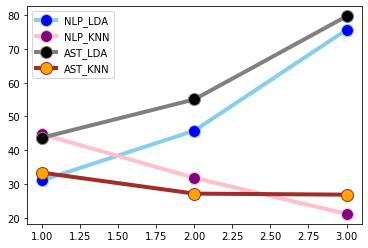

In [693]:
NLP_LDA_Accuracy= [Accuracy_at_top1,Accuracy_at_top3,Accuracy_at_top5]
NLP_KNN_Accuracy = [NLP_score[0],NLP_score[2],NLP_score[4]]
AST_LDA_Accuracy = [AST_Accuracy_at_top1,AST_Accuracy_at_top3,AST_Accuracy_at_top5]
AST_KNN_Accuracy = [AST_score[0],AST_score[2],AST_score[4]]
df=pd.DataFrame({'x': range(1,4), 'NLP_LDA': NLP_LDA_Accuracy, 'NLP_KNN': NLP_KNN_Accuracy, 'AST_LDA': AST_LDA_Accuracy, 'AST_KNN': AST_KNN_Accuracy })
plt.plot( 'x', 'NLP_LDA', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'NLP_KNN', data=df, marker='o', markerfacecolor='purple', markersize=12, color='pink', linewidth=4)
plt.plot( 'x', 'AST_LDA', data=df, marker='o', markerfacecolor='black', markersize=12, color='gray', linewidth=4)
plt.plot( 'x', 'AST_KNN', data=df, marker='o', markerfacecolor='orange', markersize=12, color='brown', linewidth=4)
plt.legend()


As we can see in above chart, "AST_LDA" has better accuracy than other methods. The accuracy of two classification methods decrease when we increase the number of K, becuase as we explain above, classification methods need more distiguished within the tokens.